In [1]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from openTSNE import TSNE
import umap

# 改成自己的路徑
df_origin = pd.read_csv('C:\\school\\SchoolProgram\\NTUST_CSIE_DS\\DataSet\\preprocessing_T1_2_3.csv')

#shape
print("Original Data Shape:", df_origin.shape)

Original Data Shape: (1795326, 36)


PCA 降維

In [3]:
# 標準化
scaler = StandardScaler()

#auto drop non-numeric, nan columns
df_numeric = df_origin.select_dtypes(include=[np.number]).dropna(axis=1)
X_scaled = scaler.fit_transform(df_numeric)

# PCA降維
pca = PCA(n_components=8, random_state=42)
pca_result = pca.fit_transform(X_scaled)

print('PCA方差比: ',pca.explained_variance_ratio_)
print('PCA方差值:',pca.explained_variance_)

PCA方差比:  [0.19530167 0.11591486 0.09902609 0.07366757 0.05388167 0.05258329
 0.05181083 0.04662601]
PCA方差值: [5.46844981 3.24561789 2.77273202 2.06269303 1.50868771 1.47233303
 1.45070418 1.30552897]


視覺化PCA

C:\Users\0978w\AppData\Local\Temp\ipykernel_18292\1997917998.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


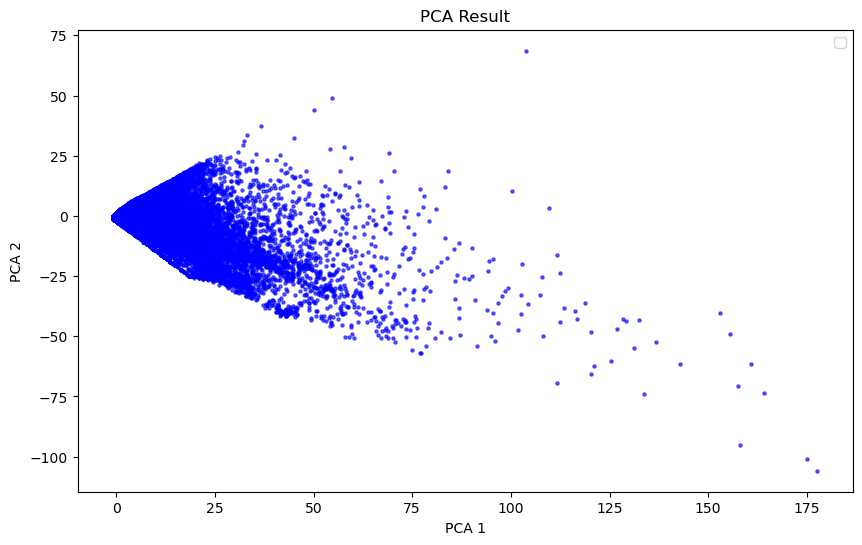

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0], pca_result[:,1], s=5, alpha=0.6, c='blue')
plt.title('PCA Result')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(False)
plt.legend()
plt.show()

T-SNE

C:\Users\0978w\AppData\Local\Temp\ipykernel_13688\185387268.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


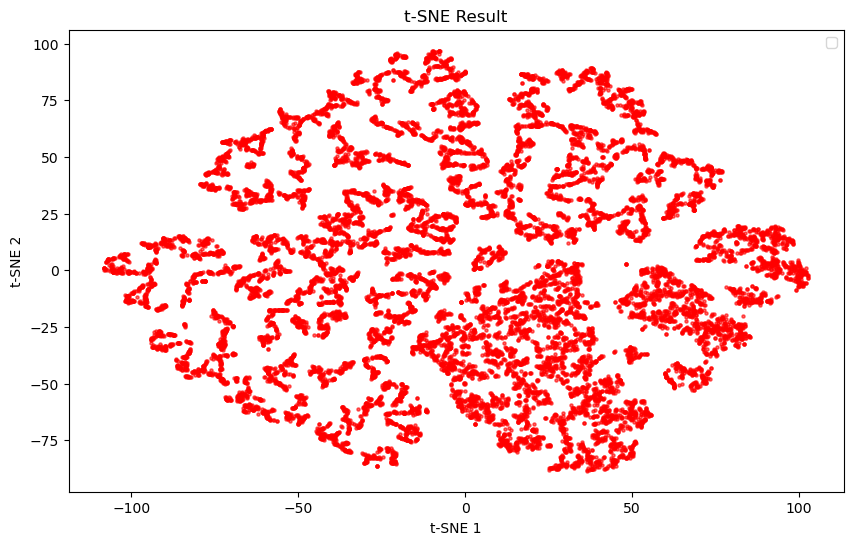

In [6]:
#1% smaple of data for t-SNE
np.random.seed(42)
sample_indices = np.random.choice(pca_result.shape[0], size=int(0.01 * pca_result.shape[0]), replace=False)
pca_sample = pca_result[sample_indices]

tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42,
)
train_reduced = tsne.fit(pca_sample)

#plot t-SNE result
plt.figure(figsize=(10,6))
plt.scatter(train_reduced[:,0], train_reduced[:,1], s=5, alpha=0.6, c='red')
plt.title('t-SNE Result')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(False)
plt.legend()
plt.show()

UMP

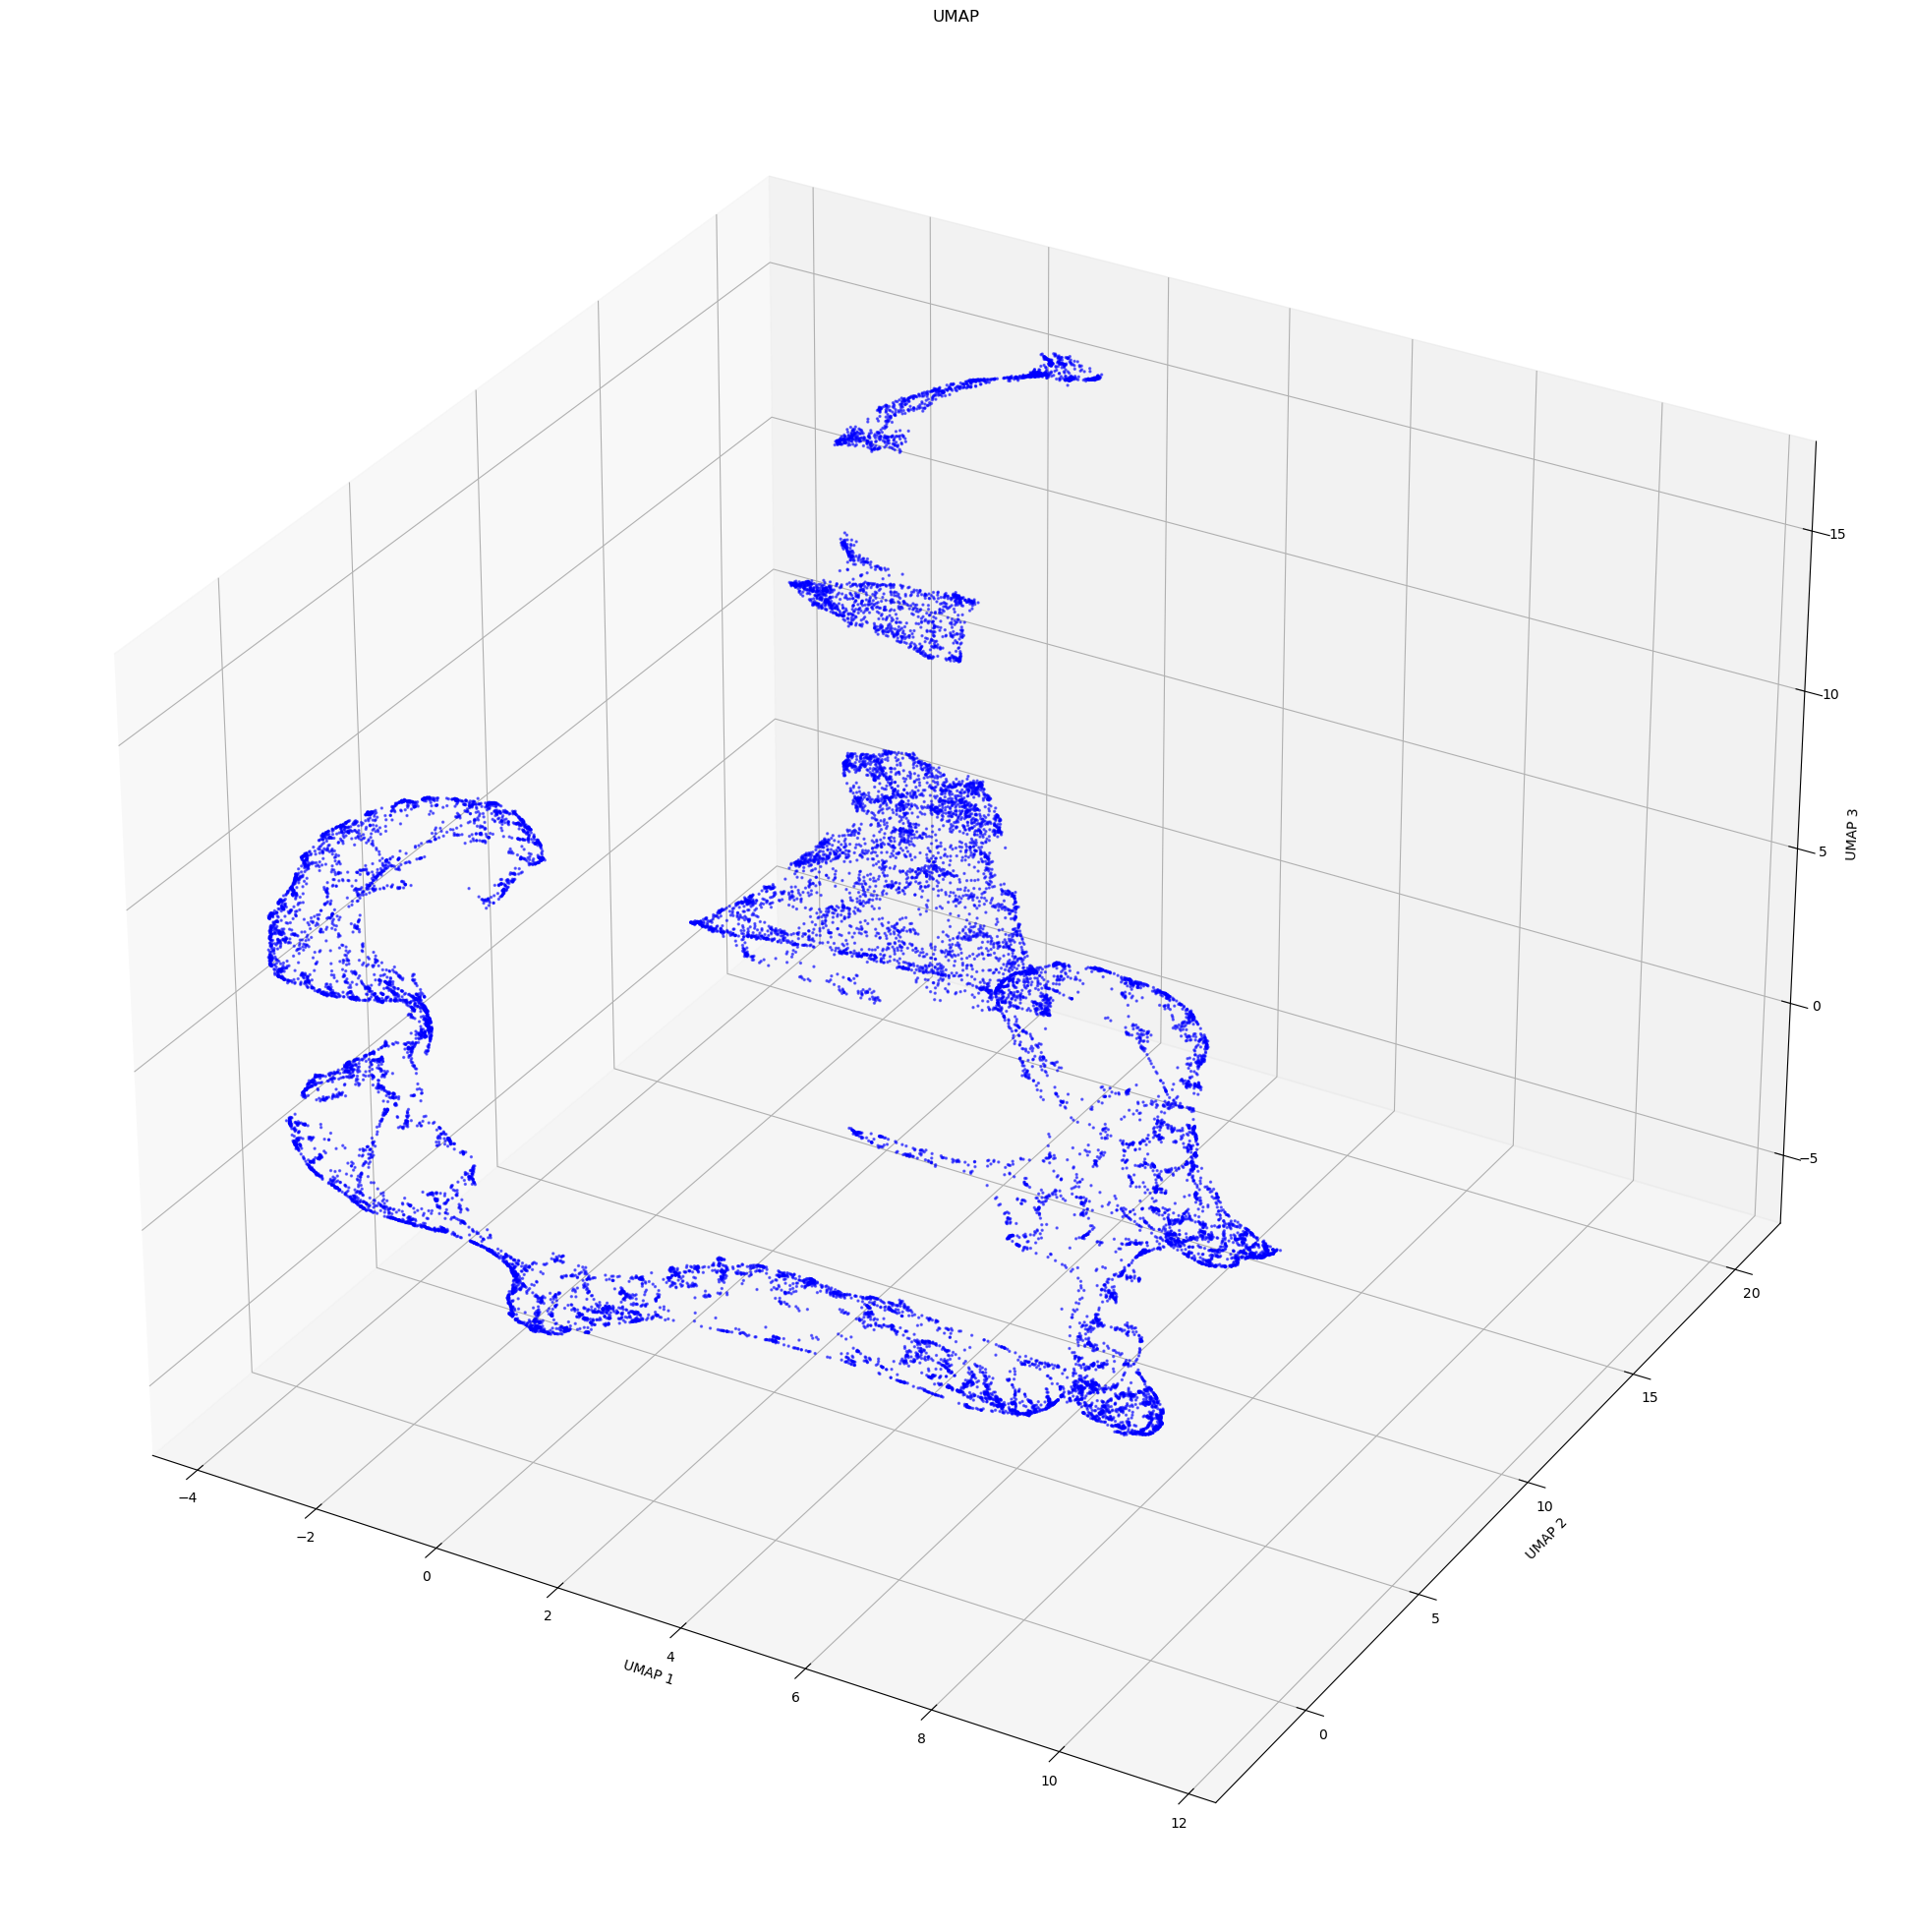

In [5]:
#10% smaple of data
np.random.seed(42)
sample_indices = np.random.choice(pca_result.shape[0], size=int(0.01 * pca_result.shape[0]), replace=False)
X_sample = pca_result[sample_indices]

reducer = umap.UMAP(n_components=3, n_neighbors =40)
X_umap = reducer.fit_transform(X_sample)

#draw 3d plot
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=2, alpha=0.5, c='blue')
ax.set_title("UMAP")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
plt.show()

#plot UMAP result
# plt.figure(figsize=(10,6))
# plt.scatter(X_umap[:,0], X_umap[:,1], s=2, alpha=0.5, c='blue')
# plt.title("UMAP")
# plt.xlabel("UMAP 1")
# plt.ylabel("UMAP 2")
# plt.grid(False)
# plt.legend()
# plt.show()